In [1650]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
import pickle


Data Processing

In [1651]:
dataset = pd.read_csv("parkinsons.data ", sep=',', index_col='name')
#print(dataset)

In [1652]:
dataset.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [1653]:
dataset.shape

(195, 23)

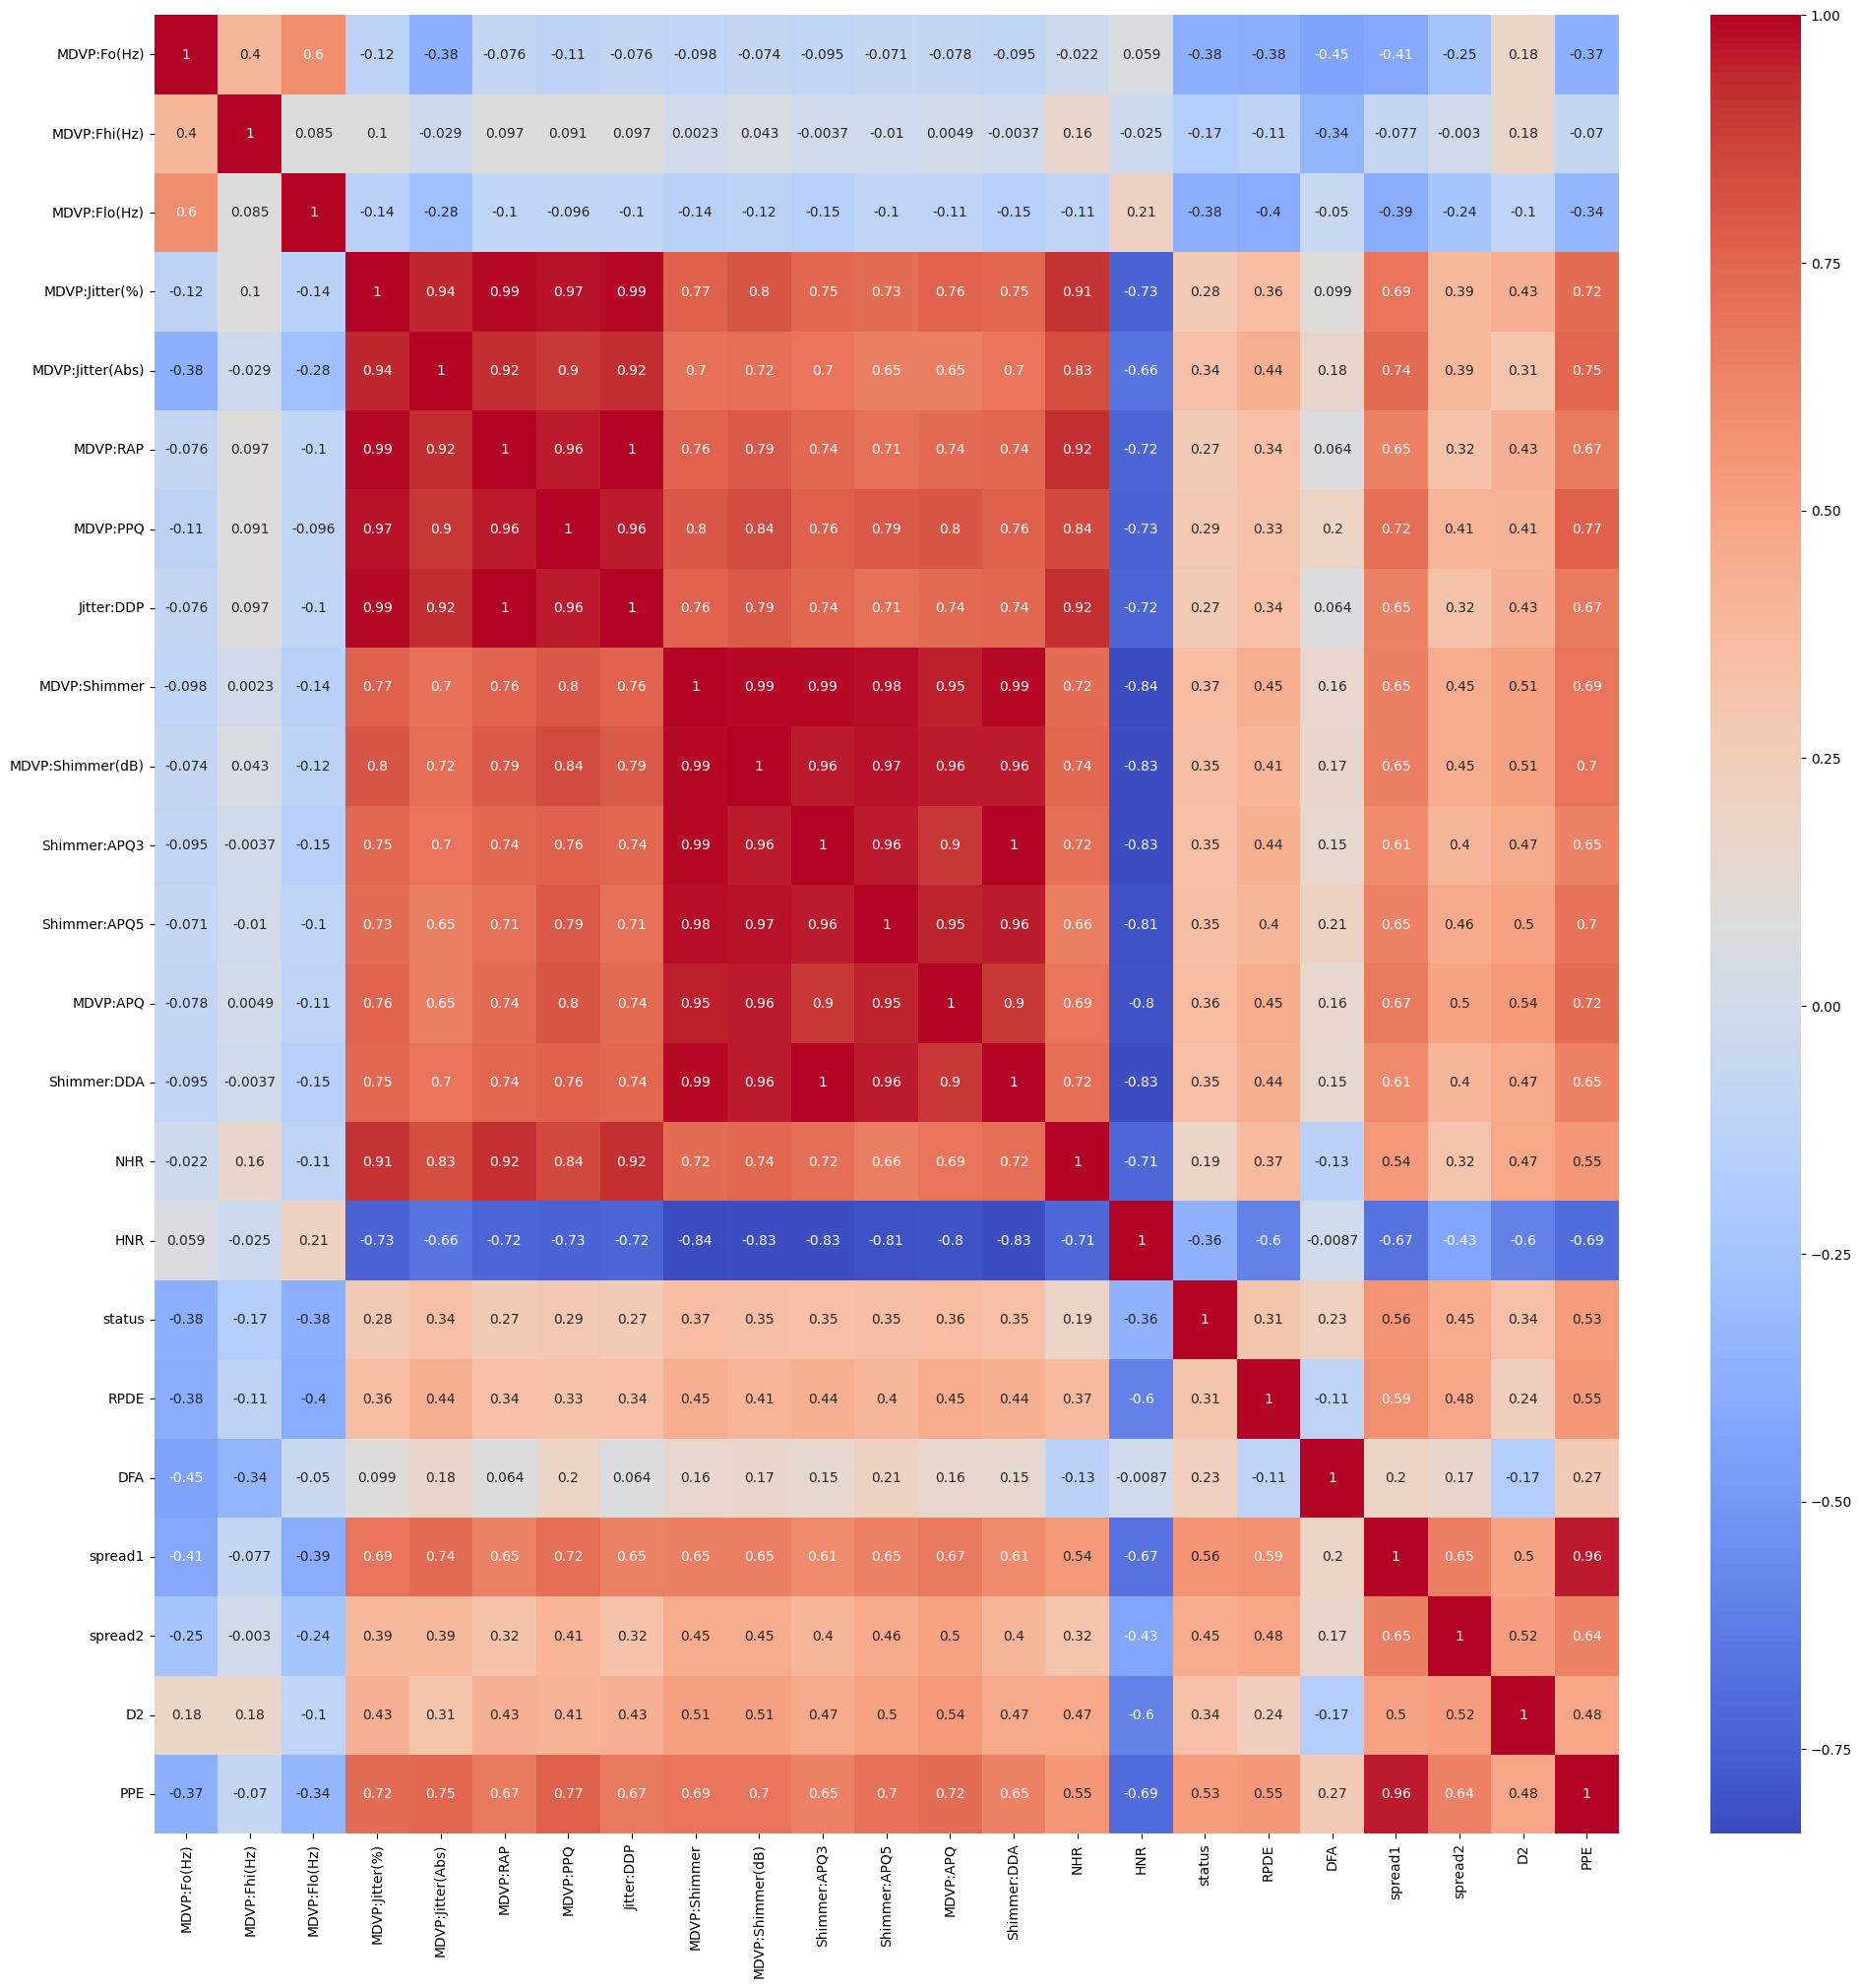

In [1654]:
# Correlation matrix
corr = dataset.corr()
plt.figure(figsize=(24, 24))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

In [1655]:
x = dataset.iloc[: , np.r_[0:16, 17:23]].values # input
y = dataset.iloc[: , 16].values #target: status 
# print(x)
# print(y)

In [1656]:

dataset.shape

(195, 23)

In [1657]:
x.shape

(195, 22)

In [1658]:
x.shape[1]


22

# splitting dataset

In [1659]:

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state= 1,stratify=y)
# print(x_train)
# print(y_train)


In [1660]:
x_test[17]

array([ 1.187470e+02,  1.237230e+02,  1.098360e+02,  3.310000e-03,
        3.000000e-05,  1.680000e-03,  1.710000e-03,  5.040000e-03,
        1.043000e-02,  9.900000e-02,  4.900000e-03,  6.210000e-03,
        9.030000e-03,  1.471000e-02,  5.040000e-03,  2.561900e+01,
        4.822960e-01,  7.230960e-01, -6.448134e+00,  1.787130e-01,
        2.034827e+00,  1.414220e-01])

In [1661]:
y_test[17]

1

In [1662]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
# Save the scaler
scaler_filename = "scaler.pkl"
with open(scaler_filename, "wb") as file:
    pickle.dump(sc, file)

In [1663]:
# x_train
# x_test

In [1664]:
# y_train
# y_test

In [1665]:
def cm_displayer(cm):
  # Create a DataFrame from the confusion matrix.
  cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

  plt.figure(figsize=(10,7))

  # Create a heatmap from the DataFrame.
  sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')

  plt.title('Confusion Matrix')
  plt.show()

# Logistic Regression

In [1666]:
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(x_train,y_train)


LogisticRegression(random_state=0)

In [1667]:
test_value =[[-5.84858231e-01, -7.23571195e-01,  7.15329331e-02,
        -1.21990710e-01, -1.36165869e-01, -4.30357898e-01,
        -4.76112596e-01, -4.30053499e-01, -7.62012217e-01,
        -7.79508995e-01, -7.19947312e-01, -9.04951931e-01,
        -7.21091736e-01, -7.19670689e-01, -2.93878202e-01,
         2.13565509e-01,  5.84178751e-01,  2.65430723e-01,
        -6.29692850e-01,  7.96178128e-01, -8.02449343e-01,
        -7.62828781e-01]]

print(lr_classifier.predict(test_value))

[1]


In [1668]:
y_pred = lr_classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]]


0.7948717948717948


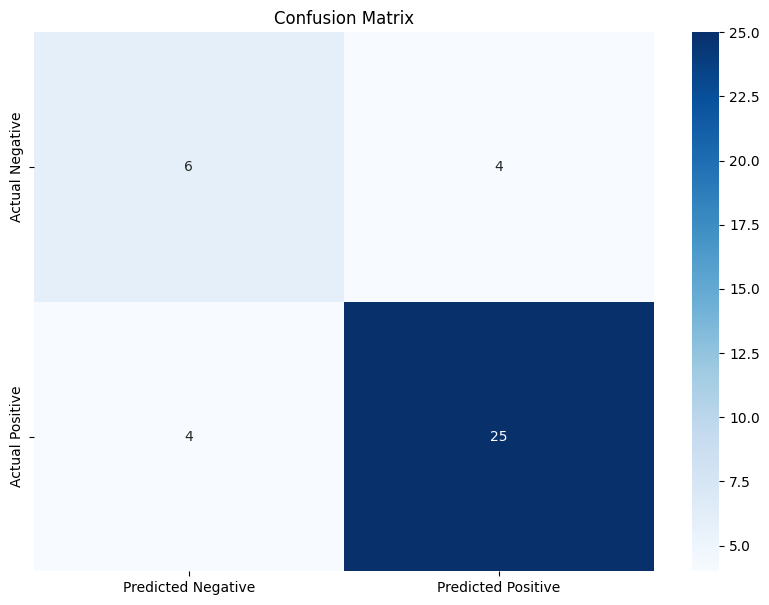

In [1669]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

In [1670]:
import pickle

LR_model_filename = "LR_model.pkl"

with open(LR_model_filename,"wb") as file:
  pickle.dump(lr_classifier,file)

In [1671]:
with open(LR_model_filename,"rb") as file:
  Pickle_LR_model = pickle.load(file)

In [1672]:
test_value = [[-5.84858231e-01, -7.23571195e-01,  7.15329331e-02,
        -1.21990710e-01, -1.36165869e-01, -4.30357898e-01,
        -4.76112596e-01, -4.30053499e-01, -7.62012217e-01,
        -7.79508995e-01, -7.19947312e-01, -9.04951931e-01,
        -7.21091736e-01, -7.19670689e-01, -2.93878202e-01,
         2.13565509e-01,  5.84178751e-01,  2.65430723e-01,
        -6.29692850e-01,  7.96178128e-01, -8.02449343e-01,
        -7.62828781e-01]]

print(Pickle_LR_model.predict(test_value))

[1]


# KNN

In [1673]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(x_train,y_train)

KNN_model_filename = "KNN_model.pkl"

with open(KNN_model_filename,"wb") as file:
  pickle.dump(knn_classifier,file)

In [1674]:
y_pred = knn_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8717948717948718


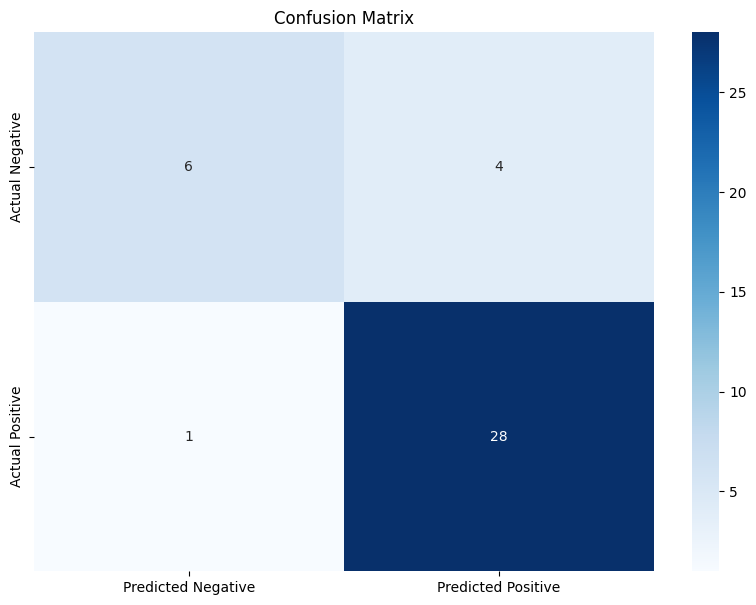

In [1675]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

# SVM

In [1676]:
svm_classifier = SVC(kernel = 'linear',random_state = 0)
svm_classifier.fit(x_train,y_train)

SVM_model_filename = "SVM_model.pkl"

with open(SVM_model_filename,"wb") as file:
  pickle.dump(svm_classifier,file)

In [1677]:
y_pred = svm_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8205128205128205


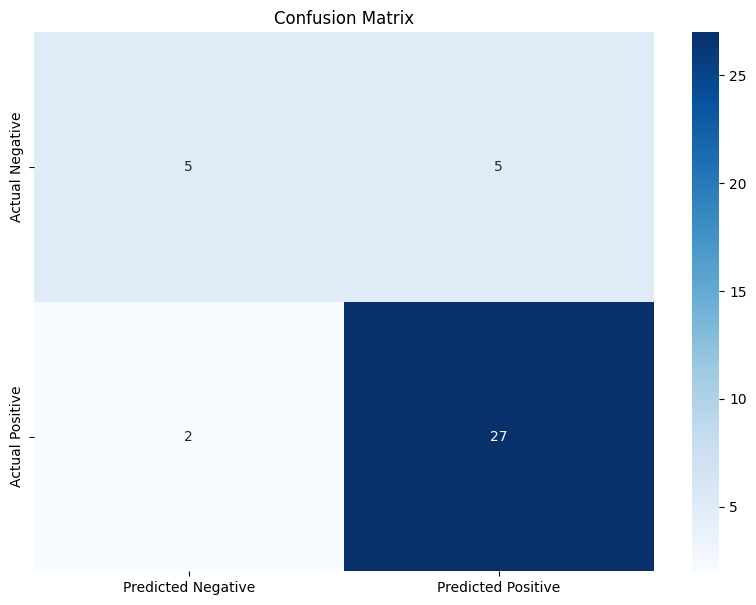

In [1678]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

Decision Tree

# Decison Tree

In [1679]:
dt_classifier = DecisionTreeClassifier(max_depth = 2 , random_state = 1)

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state= 1)

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

dt_classifier.fit(x_train, y_train)

dt_model_filename = "DT_model.pkl"

with open(dt_model_filename,"wb") as file:
  pickle.dump(dt_classifier,file)

In [1680]:
y_pred = dt_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8461538461538461


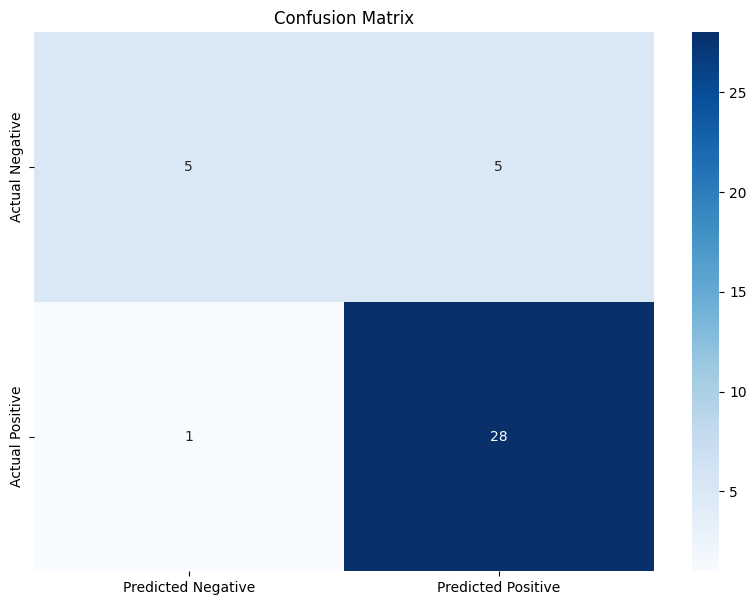

In [1681]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

# Bagging

In [1682]:
dt_classifier = DecisionTreeClassifier(max_depth = 6, random_state = 1 )

bc_classifier = BaggingClassifier(estimator = dt_classifier , n_estimators = 300, n_jobs= -1 , random_state=1)

bc_classifier.fit(x_train,y_train)

bc_model_filename = "BC_model.pkl"

with open(bc_model_filename,"wb") as file:
  pickle.dump(bc_classifier,file)

In [1683]:
y_pred = bc_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.9230769230769231


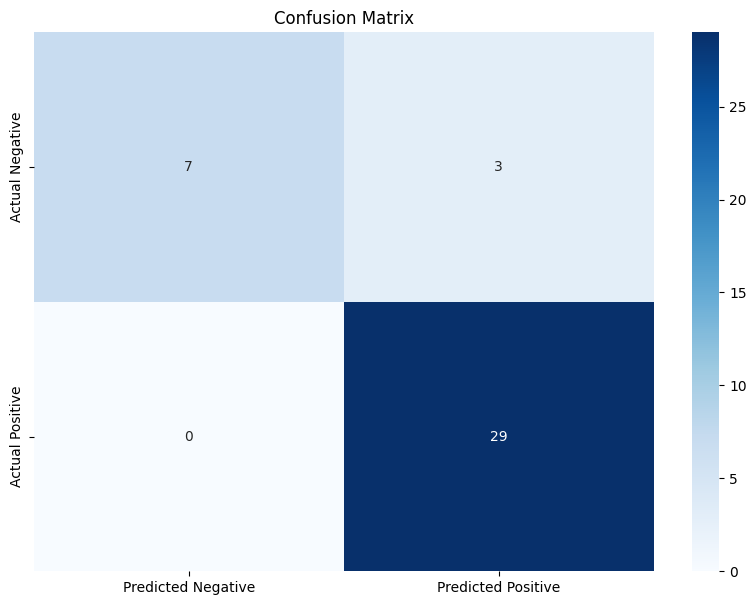

In [1684]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

In [1685]:
col = list(dataset.columns)
col.remove('status')
print(col)


['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


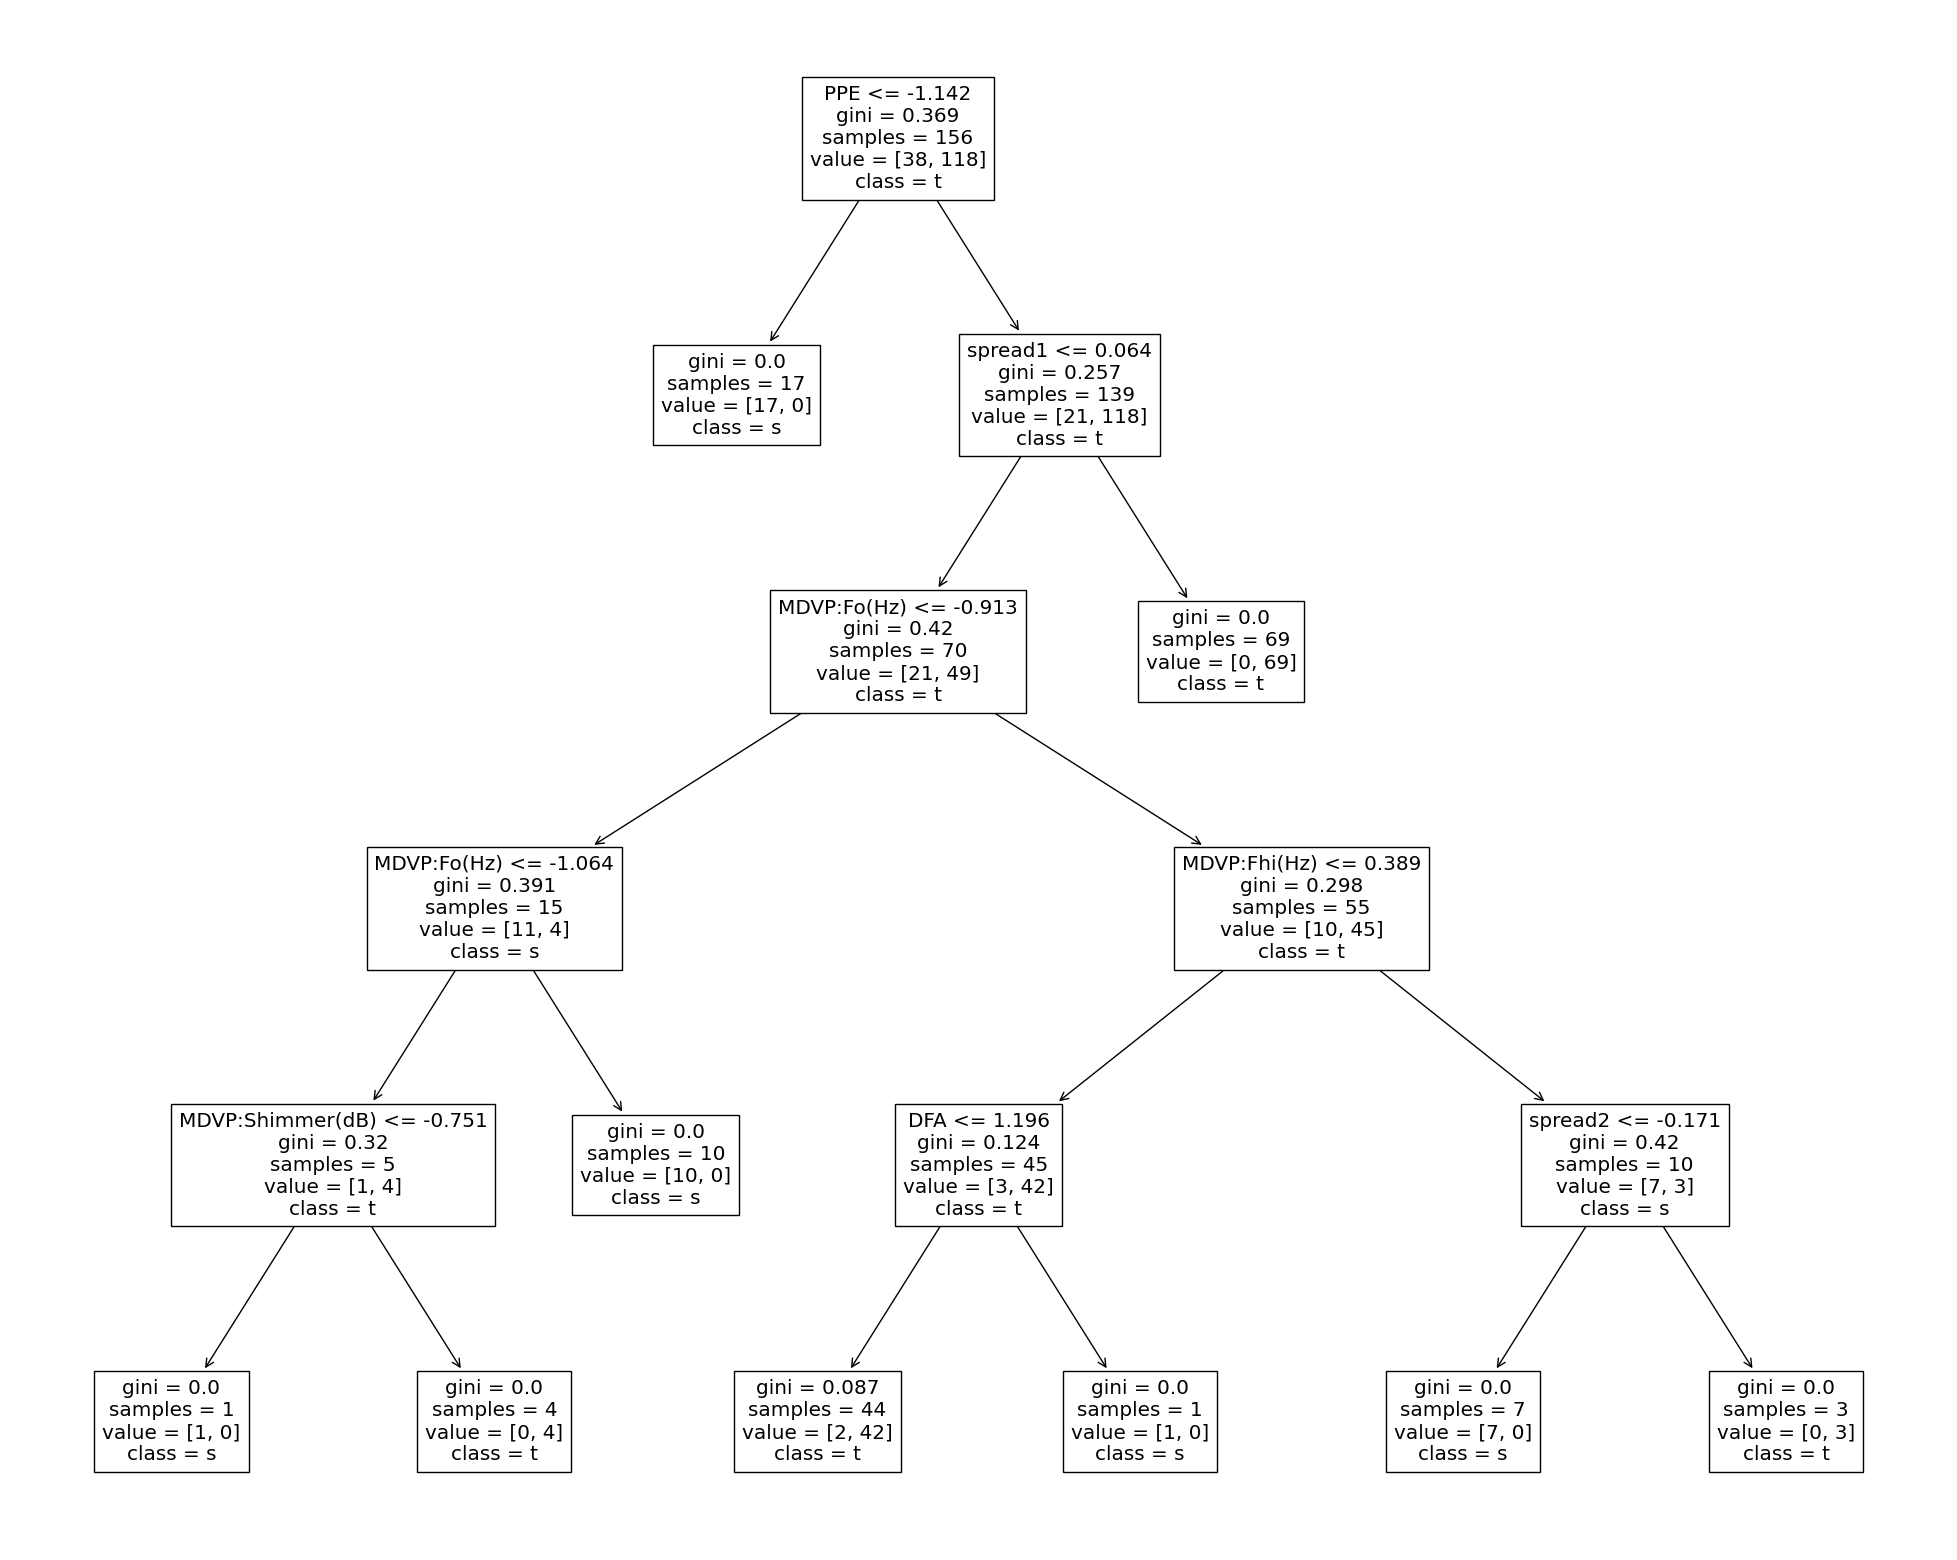

In [1686]:
fig = plt.figure(figsize=(25,20))
dt_classifier = DecisionTreeClassifier(max_depth = 5 , random_state = 1)
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state= 1)
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
dt_classifier.fit(x_train, y_train)
tree = tree.plot_tree(dt_classifier ,feature_names = col, class_names = 'status')

# Ada Boost

In [1687]:
from sklearn.ensemble import AdaBoostClassifier

abc_classifier = AdaBoostClassifier(n_estimators=50)

abc_classifier.fit(x_train,y_train)

abc_model_filename = "ABC_model.pkl"

with open(abc_model_filename,"wb") as file:
  pickle.dump(abc_classifier,file)

In [1688]:
y_pred = abc_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8717948717948718


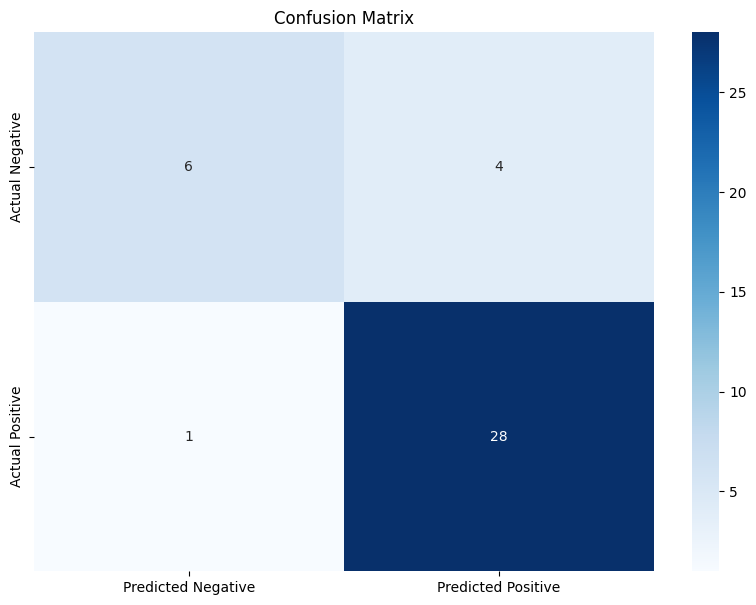

In [1689]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

Naive Bayes

In [1690]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

nb_classifier.fit(x_train,y_train)

nb_model_filename = "NB_model.pkl"

with open(nb_model_filename,"wb") as file:
  pickle.dump(nb_classifier,file)

In [1691]:
y_pred = nb_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.7948717948717948


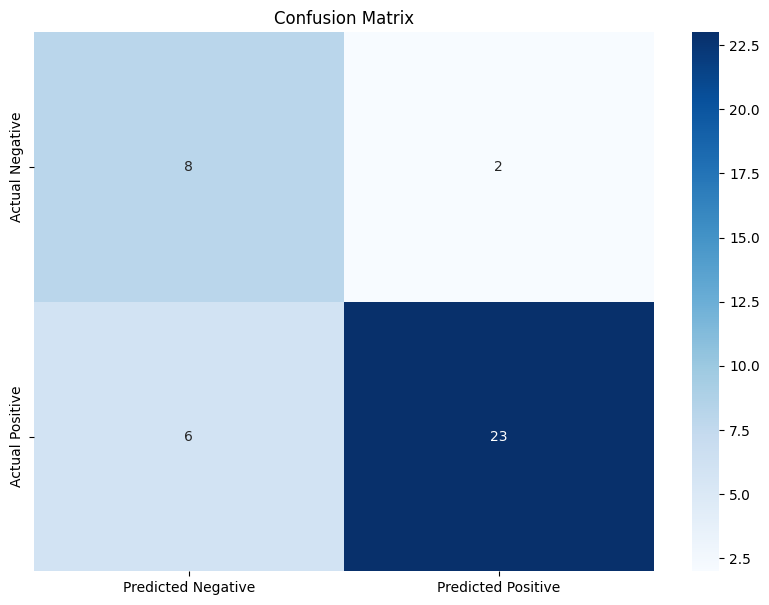

In [1692]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

# Random Forest

In [1693]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=30,criterion='entropy',random_state=1)

rf_classifier.fit(x_train,y_train)

rf_model_filename = "RF_model.pkl"

with open(rf_model_filename,"wb") as file:
  pickle.dump(rf_classifier,file)

In [1694]:
y_pred = rf_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8717948717948718


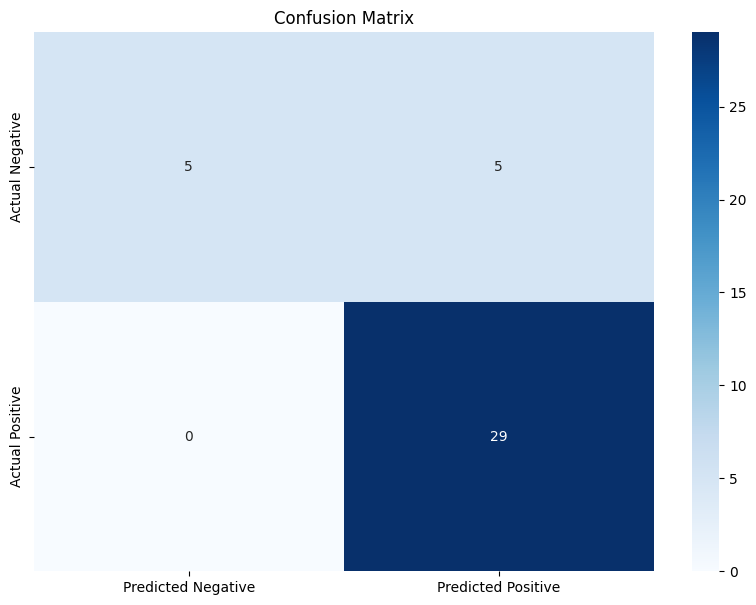

In [1695]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

XGBoost

In [1696]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()

xgb_classifier.fit(x_train,y_train)

xgb_model_filename = "XG_model.pkl"

with open(xgb_model_filename,"wb") as file:
  pickle.dump(xgb_classifier,file)

In [1697]:
y_pred = xgb_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8974358974358975


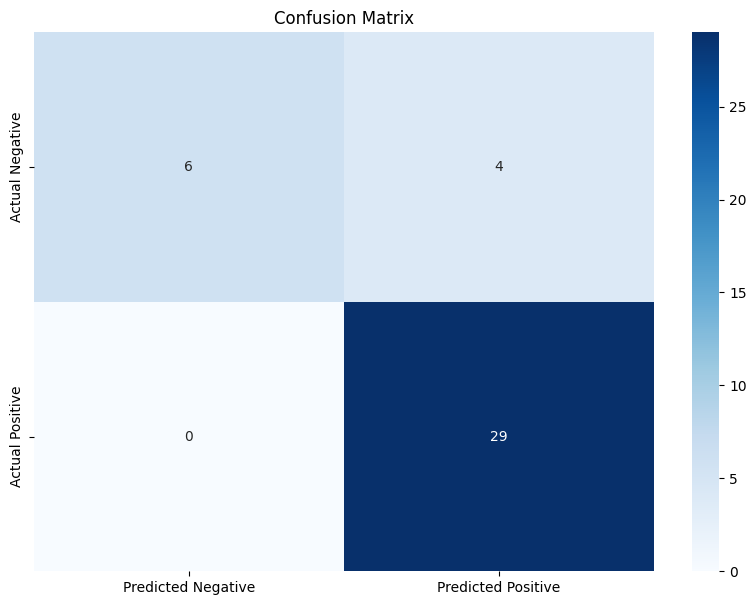

In [1698]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

# PCA Random Forests

In [1699]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state= 1,stratify=y)

pca = PCA(n_components = 9)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

pca_rf_classifier = RandomForestClassifier(n_estimators=30,criterion='entropy',random_state=1)

pca_rf_classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=1)

In [1700]:
y_pred = pca_rf_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8974358974358975


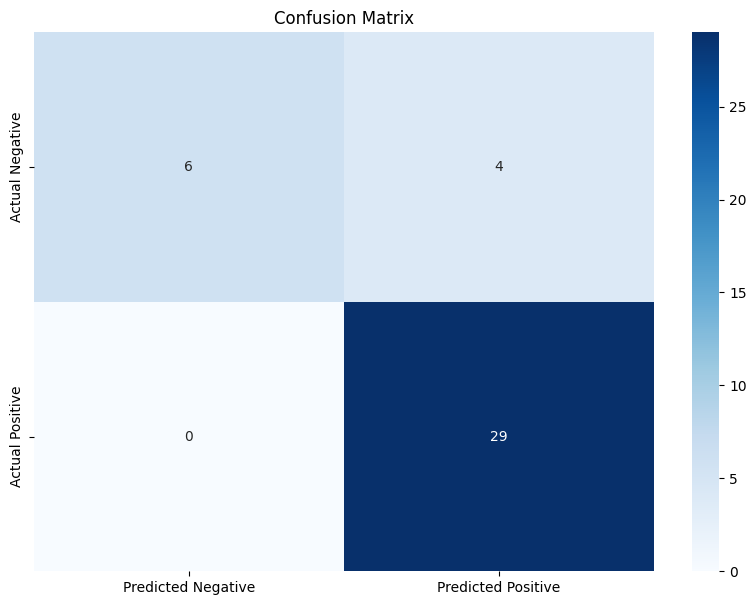

In [1701]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

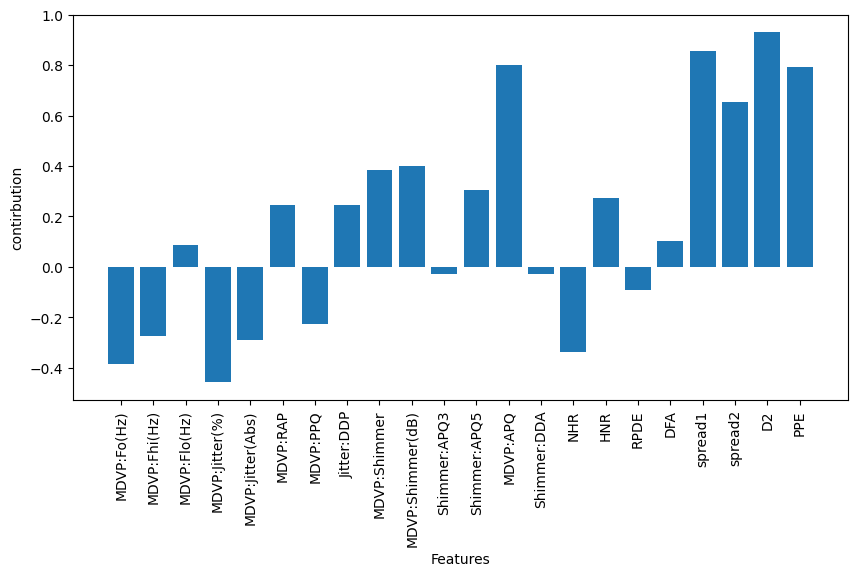

In [1702]:
import matplotlib.pyplot as plt
import numpy as np

coefficients = lr_classifier.coef_[0]

features = col

plt.figure(figsize = (10,5))
plt.xlabel("Features")
plt.ylabel("contirbution")
plt.bar(features,coefficients)
plt.xticks(rotation = 90)
plt.show()

# Accuracy , Precision , Recall And F1Score

In [1703]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [1704]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state= 1,stratify=y)
x_test = sc.fit_transform(x_test)

In [1705]:
# def metric_printer(classifier):
#     y_pred = classifier.predict(x_test)
#     print("Classifier: ", classifier.__class__.__name__)
#     print("accuracy:" ,accuracy_score(y_test, y_pred))
#     print("Precision: ", precision_score(y_test, y_pred))
#     print("Recall: ", recall_score(y_test, y_pred))
#     print("F1 Score: ", f1_score(y_test, y_pred))
#     print('____________________________________')


In [1706]:
import matplotlib.pyplot as plt

results = {}

def metric_printer(classifier):
    y_pred = classifier.predict(x_test)
    classifier_name = classifier.__class__.__name__
    print("Classifier: ", classifier_name)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: ", accuracy)
    precision = precision_score(y_test, y_pred)
    print("Precision: ", precision)
    recall = recall_score(y_test, y_pred)
    print("Recall: ", recall)
    f1 = f1_score(y_test, y_pred)
    print("F1 Score: ", f1)
    print('____________________________________')

    results[classifier_name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}




In [1707]:
metric_printer(lr_classifier)
metric_printer(nb_classifier)
metric_printer(svm_classifier)
metric_printer(dt_classifier)
metric_printer(abc_classifier)
metric_printer(rf_classifier)
metric_printer(knn_classifier)
metric_printer(bc_classifier)
metric_printer(xgb_classifier)

Classifier:  LogisticRegression
Accuracy:  0.7948717948717948
Precision:  0.8620689655172413
Recall:  0.8620689655172413
F1 Score:  0.8620689655172413
____________________________________
Classifier:  GaussianNB
Accuracy:  0.7948717948717948
Precision:  0.92
Recall:  0.7931034482758621
F1 Score:  0.851851851851852
____________________________________
Classifier:  SVC
Accuracy:  0.8205128205128205
Precision:  0.84375
Recall:  0.9310344827586207
F1 Score:  0.8852459016393444
____________________________________
Classifier:  DecisionTreeClassifier
Accuracy:  0.8461538461538461
Precision:  0.8709677419354839
Recall:  0.9310344827586207
F1 Score:  0.9
____________________________________
Classifier:  AdaBoostClassifier
Accuracy:  0.8717948717948718
Precision:  0.875
Recall:  0.9655172413793104
F1 Score:  0.9180327868852458
____________________________________
Classifier:  RandomForestClassifier
Accuracy:  0.8717948717948718
Precision:  0.8529411764705882
Recall:  1.0
F1 Score:  0.9206349206

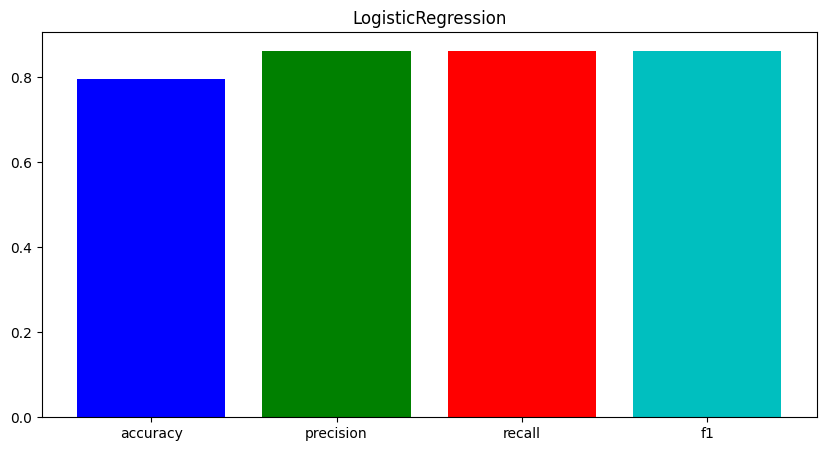

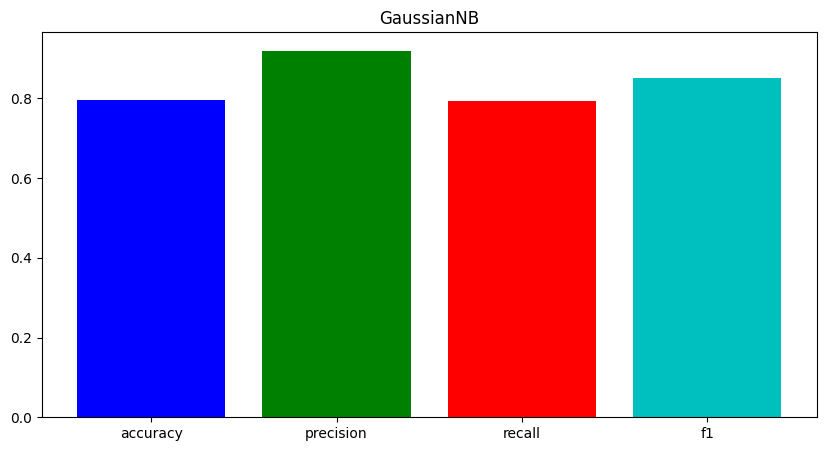

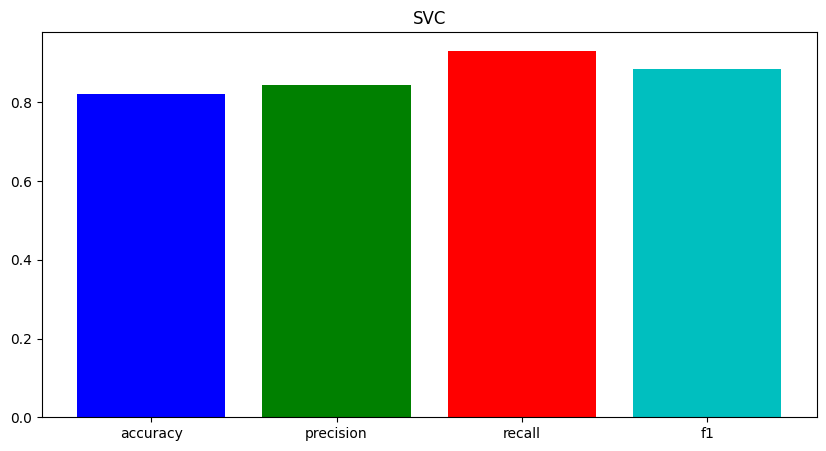

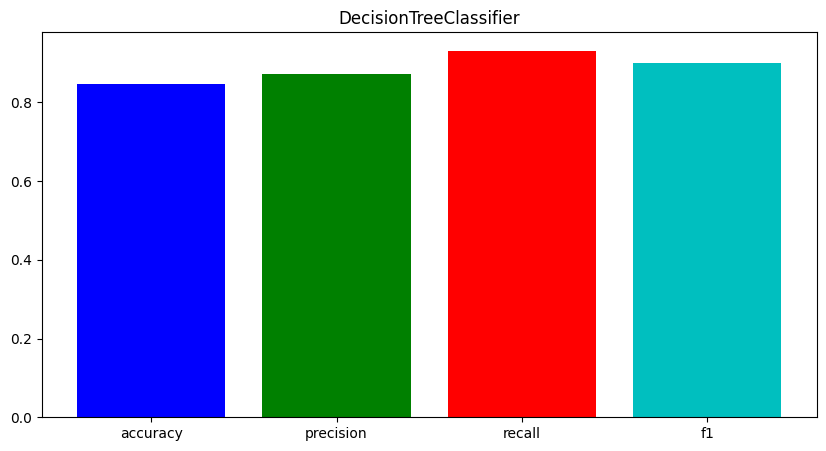

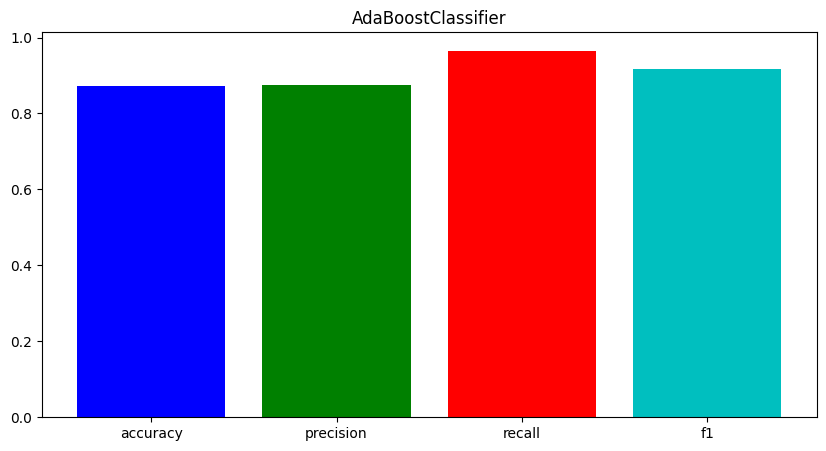

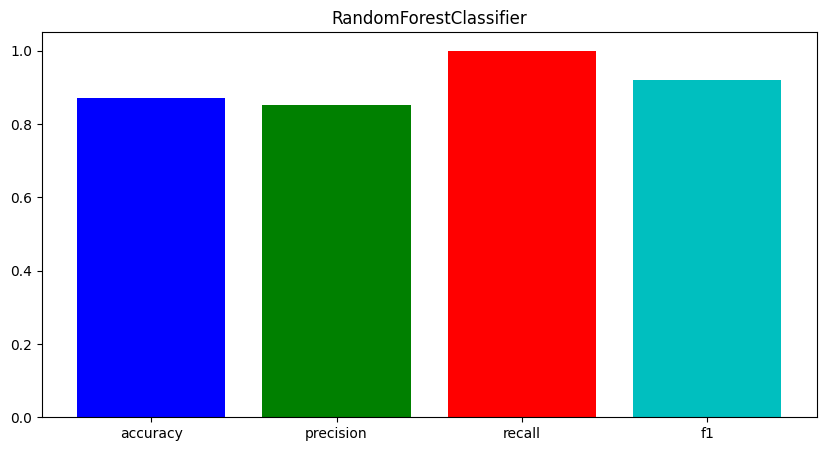

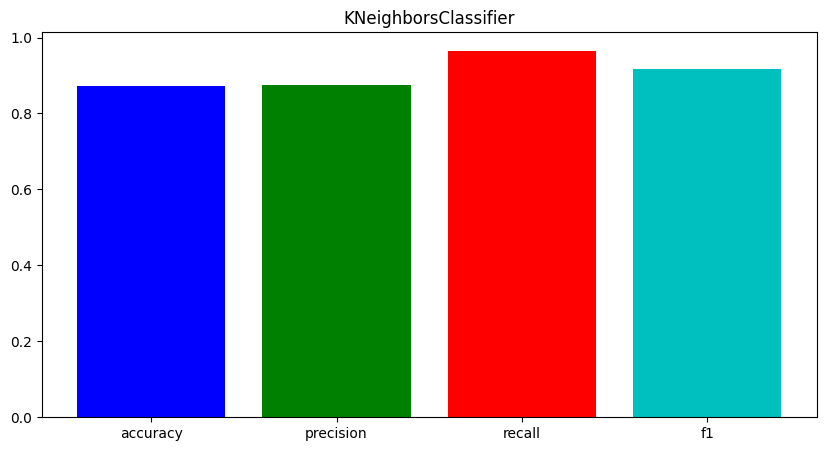

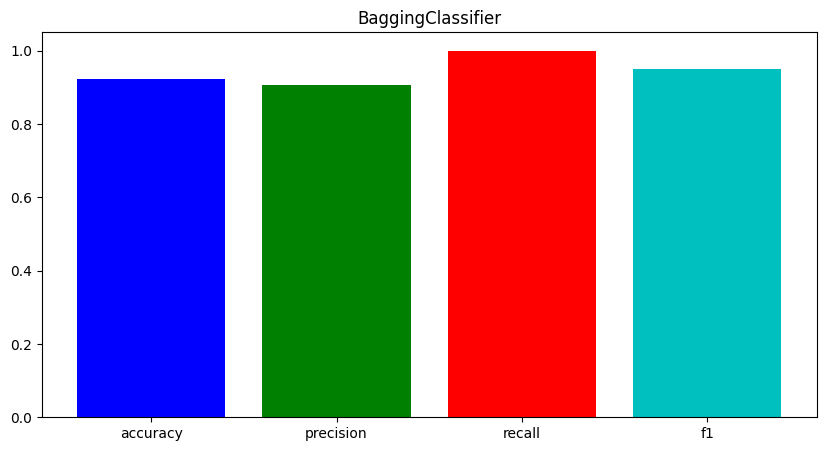

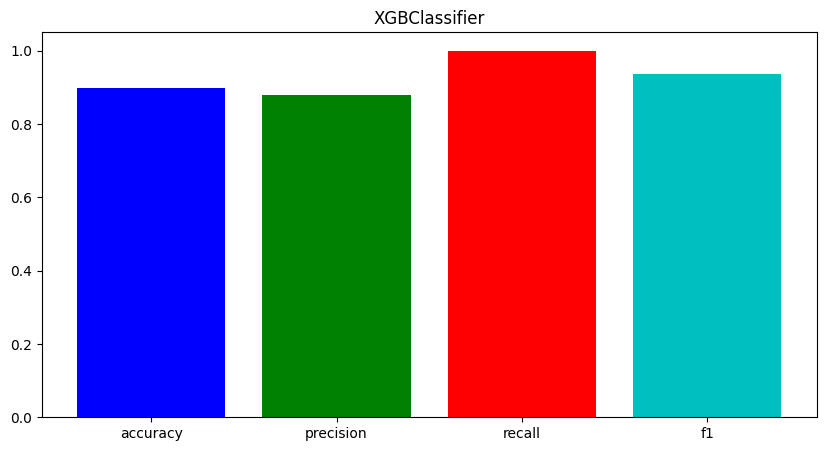

In [1708]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
def plot_results(results):
    for classifier_name, metrics in results.items():
        plt.figure(figsize=(10,5))
        plt.bar(metrics.keys(), metrics.values(),color=colors)
        plt.title(classifier_name)
        plt.show()

plot_results(results)

# **Comparision Of Accuracy Of Different Classifiers** 

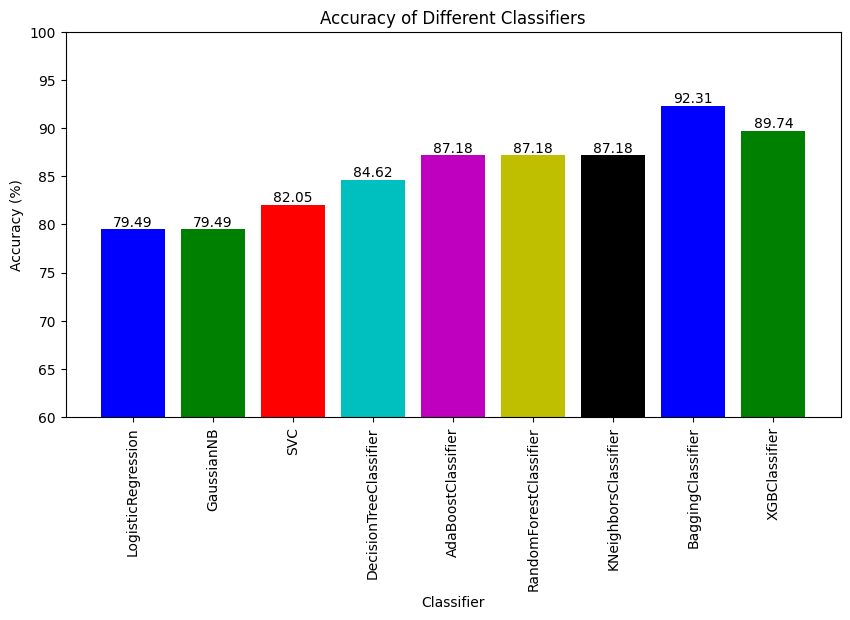

In [1709]:
def plot_results(results):
    plt.figure(figsize=(10,5))

    classifier_names = [name for name in results.keys()]
    accuracies = [metrics['accuracy']*100 for metrics in results.values()]

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    bars = plt.bar(classifier_names, accuracies, color = colors)
    plt.title('Accuracy of Different Classifiers')
    plt.xlabel('Classifier')
    plt.ylabel('Accuracy (%)')
    plt.ylim([60, 100])
    plt.xticks(rotation=90)

    for bar in bars:
        yval = round(bar.get_height(), 2)
        plt.text(bar.get_x() + bar.get_width()/2, yval, yval,va='bottom',ha='center')

    plt.show()

plot_results(results)
